# More advanced array operations
#### Computational Methods for Geoscience - EPS 400/522
#### Instructor: Eric Lindsey

---------

In [76]:
# some useful imports and settings
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# better looking figures on high-resolution screens
%config InlineBackend.figure_format = 'retina'

### Array slicing and striding

In [77]:
a = np.array([0, 1, 2, 3, 4])
b = a[1:4:2]  # start:stop:step
print(b)

[1 3]


### Logical indexing

In [78]:
a = np.array([1, 2, 3, 4, 5])
b = a[a > 3]
print(b)

[4 5]


### Easy statistics

In [111]:
a = np.array([1, 2, 3, 4, 7])
print('Mean:', np.mean(a))
print('Stdev:', np.std(a))
print('Median:', np.median(a))

Mean: 3.4
Stdev: 2.0591260281974
Median: 3.0


### Stacking 1D arrays to make a 2d array

In [79]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
# stack vertically
c = np.vstack( (a,b) ) # note, input is a tuple of the arrays
print(c) 
# stack horizontally
print(np.hstack( (a,b) )) 

[[1 2 3 4 5]
 [5 4 3 2 1]]
[1 2 3 4 5 5 4 3 2 1]


### Splitting 2D arrays

In [80]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])
# stack vertically
c = np.vstack( (a,b) )
print(c) 

# split again - specify how many to split into
d,e = np.vsplit(c,2)
print(d,e)
# caution - the new result is still 2D, not the same shape as the original
print('shape of a:',np.shape(a), 'shape of d:', np.shape(d))

[[1 2 3 4 5]
 [5 4 3 2 1]]
[[1 2 3 4 5]] [[5 4 3 2 1]]
shape of a: (5,) shape of d: (1, 5)


### Tiling (repeating) an array

In [123]:
a = np.array([1, 2, 3, 4, 5])
print('a',a)
b = np.tile(a, (3,2)) # repeat 3 times vertically and twice horizontally
print('b:\n', b)

a [1 2 3 4 5]
b:
 [[1 2 3 4 5 1 2 3 4 5]
 [1 2 3 4 5 1 2 3 4 5]
 [1 2 3 4 5 1 2 3 4 5]]


### Combining 1D arrays as columns

The above examples use 1D arrays as rows in a matrix, but often we want them to be columns.

In [130]:
a = np.array([1, 2, 3, 4, 5])
print('a:',a)
b = np.column_stack((a,a+2,0*a))
print('b:\n', b)

a: [1 2 3 4 5]
b:
 [[1 3 0]
 [2 4 0]
 [3 5 0]
 [4 6 0]
 [5 7 0]]


### Slicing in 2D

In [131]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(a)

# grab a section of an array
b = a[0:2, 1:3]
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[2 3]
 [5 6]]


### Array broadcasting - automatic for loops!

In broadcasting, numpy automatically applies an operation to each element.

This can save a lot of human and computer time!

In [132]:
a = np.array([1, 2, 3])
b = a + 5  # Broadcasting
print(a)
print(b)

[1 2 3]
[6 7 8]


### Finding the nearest value

Use .argmin() on an array to find the location of its minimum value.

In [82]:
# Define the depth and seismic velocity arrays
depths = np.array([0, 10, 20, 30, 50])
velocities = np.array([5.8, 6.1, 6.3, 6.6, 8.0])

# Find the seismic velocity at a given depth using .argmin() for nearest-neighbor interpolation
def find_seismic_velocity(depth):
    idx = (np.abs(depths - depth)).argmin()
    return velocities[idx]

# Test the function
print("Velocity at depth   0:", find_seismic_velocity(0))  # Output will be 5.8
print("Velocity at depth  10:", find_seismic_velocity(10))  # Output will be 6.1

# Output will be 8.0 because 100 km is closest to 50 km (nearest neighbor)
print("Velocity at depth 100:", find_seismic_velocity(100))  


Velocity at depth   0: 5.8
Velocity at depth  10: 6.1
Velocity at depth 100: 8.0


### Linear interpolation


In [133]:
# Function to find the seismic velocity using linear interpolation
def interp_seismic_velocity(depth):
    return np.interp(depth, depths, velocities)

# Output for an intermediate depth, e.g., 15 km, will be linearly interpolated
print("Velocity at depth  14:", interp_seismic_velocity(14))  # Output will be between 6.1 and 6.3

# Numpy interp does not extrapolate by default, so it will return 8.0 for 100 km
print("Velocity at depth 100:", interp_seismic_velocity(100))


Velocity at depth  14: 6.18
Velocity at depth 100: 8.0


### Cubic interpolation

This method fits a polynomial to the data for interpolation. This can give smoother results, but can also lead to extrapolation errors.

In [134]:
# Create cubic interpolation function
cubic_interp = interpolate.interp1d(depths, velocities, kind='cubic', fill_value='extrapolate')

# Function to find the seismic velocity using cubic interpolation
def cubic_interp_seismic_velocity(depth):
    return cubic_interp(depth)

# Output for an intermediate depth, e.g., 15 km, will be linearly interpolated
print("Velocity at depth  14:", cubic_interp_seismic_velocity(14))  # Output will be between 6.1 and 6.3

# We set this to extrapolate, but warning - the results may not make sense!
print("Velocity at depth 100:", cubic_interp_seismic_velocity(100))


Velocity at depth  14: 6.179811764705884
Velocity at depth 100: 21.38235294117652


### Visualize the results


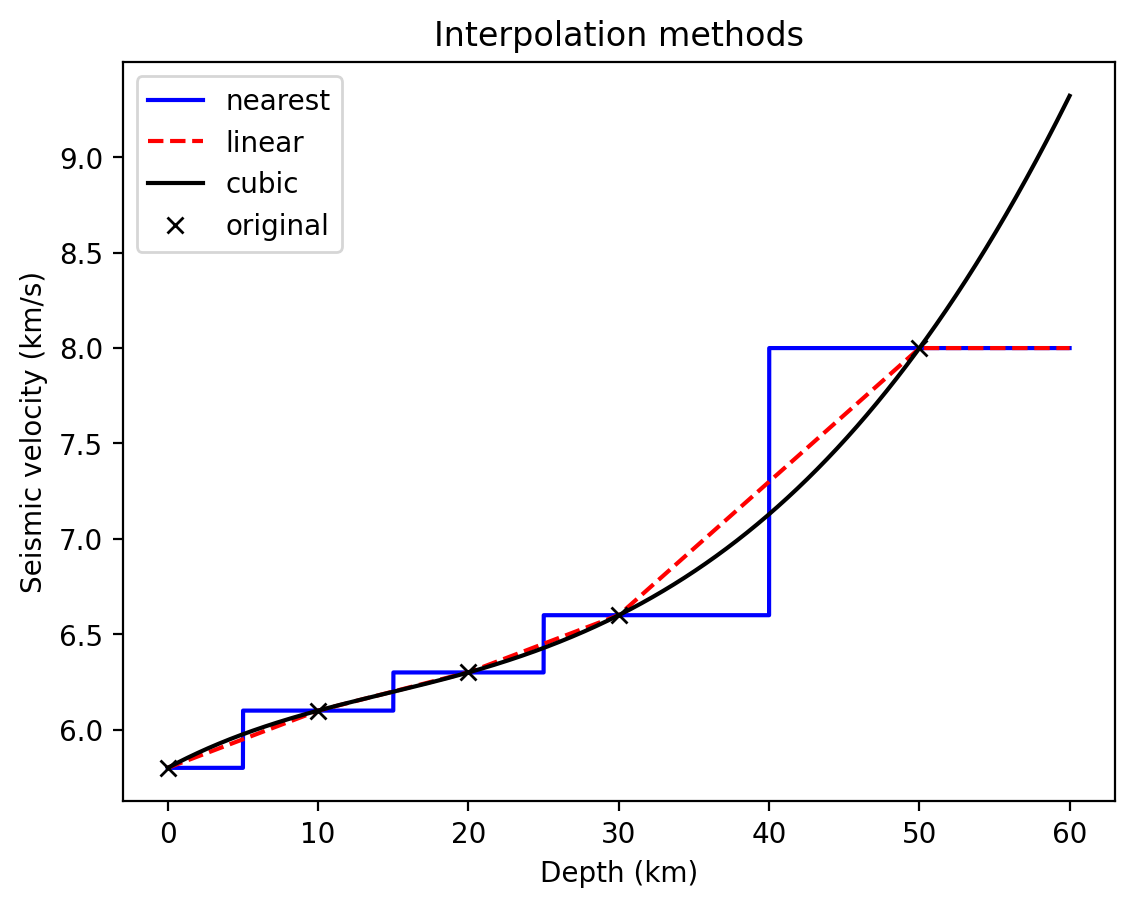

In [136]:
# get a list of depths to interpolate at
depthlist = np.arange(0,60,0.01)

# run each function to get the interpolated velocities
# note, numppy and scipy will automatically use broadcasting to do the interpolation for each depth.
vel_linear = interp_seismic_velocity(depthlist)
vel_cubic = cubic_interp_seismic_velocity(depthlist)

# using a list comprehension instead, because
# np.abs(depth - depths) does not work for 2 different size lists
vel_nearest = [find_seismic_velocity(d) for d in depthlist]

plt.plot(depthlist,vel_nearest,'-b',label='nearest')
plt.plot(depthlist,vel_linear,'--r',label='linear')
plt.plot(depthlist,vel_cubic,'-k',label='cubic')
plt.plot(depths,velocities,'kx',label='original')
plt.xlabel('Depth (km)')
plt.ylabel('Seismic velocity (km/s)')
plt.title('Interpolation methods')
plt.legend()
plt.show()

### Gridding in 2D

When we want to interpolate scattered data in 2 dimensions, it's common to  resample them onto a grid, since that is a nice way to plot data as an image.

Here is an example with scattered data, which we interpolate onto a grid:


(1000,)
(1000,)


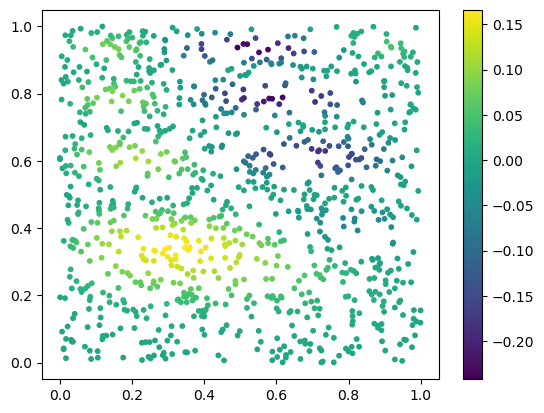

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# define a mathematical function that we resample from
def myfunc(x,y):
    return x*(1-x)*np.cos(2*np.pi*x*y) * np.sin(4*np.pi*y**2)**2

# create scattered x,y, and z values
x=np.random.rand(1000)
y=np.random.rand(1000)
z = myfunc(x,y)

print(np.shape(x))
print(np.shape(y))

# plot these scattered data to get a look at them
plt.scatter(x,y,s=10,c=z)
plt.colorbar()
plt.show()

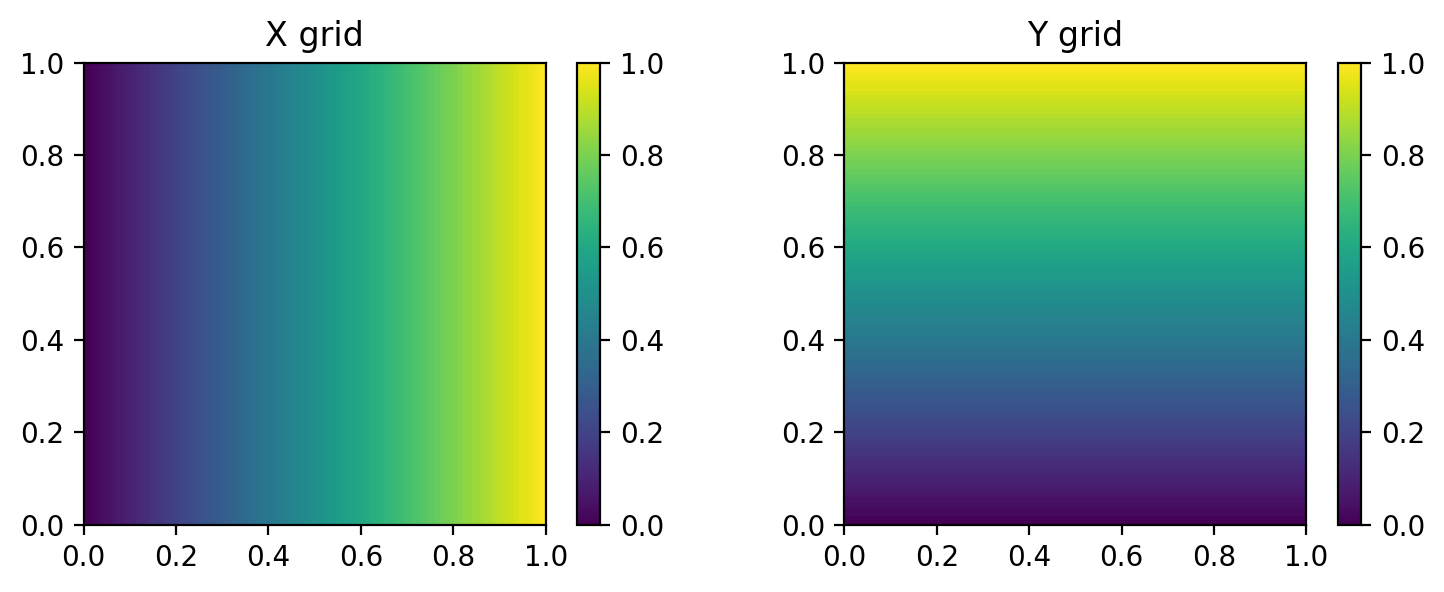

In [138]:
# get some gridded locations that we will interpolate onto
xvec=np.linspace(0,1,100)
yvec=np.linspace(0,1,100)

# key method: meshgrid turns our x and y vectors in to matrices
grid_x, grid_y = np.meshgrid(xvec,yvec)

# let's take a look at these gridded x and y values:
plt.figure(figsize=(9,3))
plt.subplot(121)
plt.imshow(grid_x, extent=(0,1,0,1), origin='lower')
plt.title('X grid')
plt.colorbar()
plt.subplot(122)
plt.imshow(grid_y, extent=(0,1,0,1), origin='lower')
plt.title('Y grid')
plt.colorbar()
plt.show()

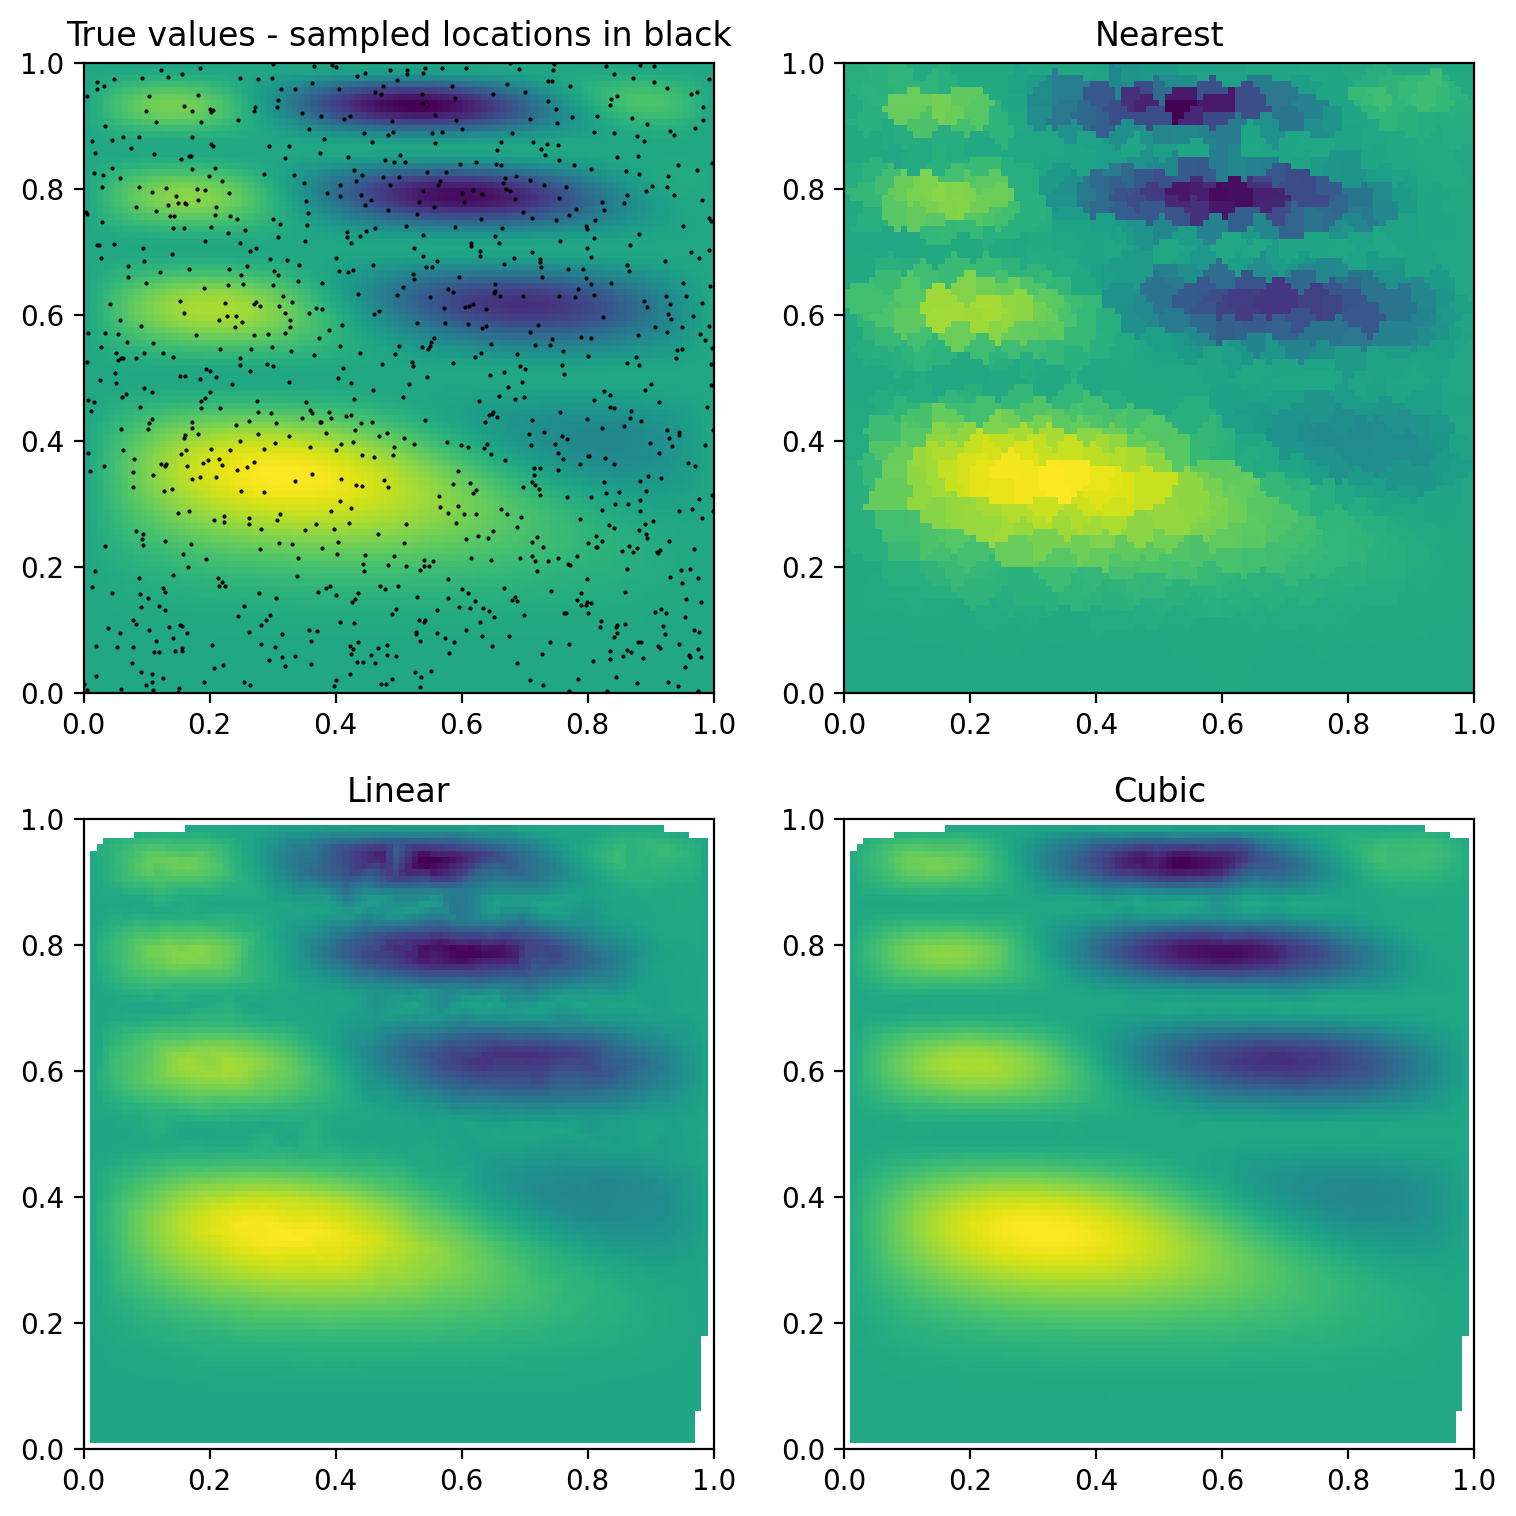

In [139]:
grid_z0 = interpolate.griddata((x,y), z, (grid_x, grid_y), method='nearest')


grid_z1 = interpolate.griddata((x,y), z, (grid_x, grid_y), method='linear')
grid_z2 = interpolate.griddata((x,y), z, (grid_x, grid_y), method='cubic')

plt.figure(figsize=(9,9))
plt.subplot(221)
plt.imshow(myfunc(grid_x, grid_y), extent=(0,1,0,1), origin='lower')
plt.plot(x, y, 'k.', ms=1)
plt.title('True values - sampled locations in black')
plt.subplot(222)
plt.imshow(grid_z0, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.show()